In [1]:

pip install qiskit qiskit-aer --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 105.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00


In [13]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from math import pi
import matplotlib.pyplot as plt

sim = AerSimulator()

def run_and_display(qc, title="Circuit"):
    compiled = transpile(qc, sim)
    result = sim.run(compiled, shots=1024).result()
    counts = result.get_counts()
    print(f"\n🧪 {title}")
    print(qc.draw())
    print(f"Measurement Counts: {counts}")
    plot_histogram(counts, title=title)
    plt.show()
    return counts

In [6]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# **1. Change Gate Order**

In [14]:
qc_swap = QuantumCircuit(1, 1)
qc_swap.h(0)        # H first
qc_swap.x(0)        # X after
qc_swap.s(0)
qc_swap.t(0)
qc_swap.rz(0.5, 0)
qc_swap.measure_all()

counts_swap = run_and_display(qc_swap, "1️⃣ Swapped Order: H then X")


🧪 1️⃣ Swapped Order: H then X
        ┌───┐┌───┐┌───┐┌───┐┌─────────┐ ░ ┌─┐
     q: ┤ H ├┤ X ├┤ S ├┤ T ├┤ Rz(0.5) ├─░─┤M├
        └───┘└───┘└───┘└───┘└─────────┘ ░ └╥┘
   c: 1/═══════════════════════════════════╬═
                                           ║ 
meas: 1/═══════════════════════════════════╩═
                                           0 
Measurement Counts: {'1 0': 555, '0 0': 469}


# **2. Vary Rotation Angle**

In [15]:
angles = [pi/4, pi/2, pi]
counts_angles = {}
for theta in angles:
    qc_angle = QuantumCircuit(1, 1)
    qc_angle.x(0)
    qc_angle.h(0)
    qc_angle.s(0)
    qc_angle.t(0)
    qc_angle.rz(theta, 0)
    qc_angle.measure_all()
    counts_angles[theta] = run_and_display(qc_angle, f"2️⃣ RZ rotation angle θ = {theta:.3f} rad")


🧪 2️⃣ RZ rotation angle θ = 0.785 rad
        ┌───┐┌───┐┌───┐┌───┐┌─────────┐ ░ ┌─┐
     q: ┤ X ├┤ H ├┤ S ├┤ T ├┤ Rz(π/4) ├─░─┤M├
        └───┘└───┘└───┘└───┘└─────────┘ ░ └╥┘
   c: 1/═══════════════════════════════════╬═
                                           ║ 
meas: 1/═══════════════════════════════════╩═
                                           0 
Measurement Counts: {'1 0': 499, '0 0': 525}

🧪 2️⃣ RZ rotation angle θ = 1.571 rad
        ┌───┐┌───┐┌───┐┌───┐┌─────────┐ ░ ┌─┐
     q: ┤ X ├┤ H ├┤ S ├┤ T ├┤ Rz(π/2) ├─░─┤M├
        └───┘└───┘└───┘└───┘└─────────┘ ░ └╥┘
   c: 1/═══════════════════════════════════╬═
                                           ║ 
meas: 1/═══════════════════════════════════╩═
                                           0 
Measurement Counts: {'0 0': 540, '1 0': 484}

🧪 2️⃣ RZ rotation angle θ = 3.142 rad
        ┌───┐┌───┐┌───┐┌───┐┌───────┐ ░ ┌─┐
     q: ┤ X ├┤ H ├┤ S ├┤ T ├┤ Rz(π) ├─░─┤M├
        └───┘└───┘└───┘└───┘└───────┘ ░ └╥┘
   c: 1/═════════

# **3. Remove a Gate**

In [16]:
angles = [pi/4, pi/2, pi]
counts_no_h_angle = {}
for theta in angles:
    qc_angle = QuantumCircuit(1, 1)
    qc_angle.x(0)
    qc_angle.s(0)
    qc_angle.t(0)
    qc_angle.rz(theta, 0)
    qc_angle.measure_all()
    counts_no_h_angle[theta] = run_and_display(qc_angle, f" RZ rotation angle θ = {theta:.3f} rad")


🧪  RZ rotation angle θ = 0.785 rad
        ┌───┐┌───┐┌───┐┌─────────┐ ░ ┌─┐
     q: ┤ X ├┤ S ├┤ T ├┤ Rz(π/4) ├─░─┤M├
        └───┘└───┘└───┘└─────────┘ ░ └╥┘
   c: 1/══════════════════════════════╬═
                                      ║ 
meas: 1/══════════════════════════════╩═
                                      0 
Measurement Counts: {'1 0': 1024}

🧪  RZ rotation angle θ = 1.571 rad
        ┌───┐┌───┐┌───┐┌─────────┐ ░ ┌─┐
     q: ┤ X ├┤ S ├┤ T ├┤ Rz(π/2) ├─░─┤M├
        └───┘└───┘└───┘└─────────┘ ░ └╥┘
   c: 1/══════════════════════════════╬═
                                      ║ 
meas: 1/══════════════════════════════╩═
                                      0 
Measurement Counts: {'1 0': 1024}

🧪  RZ rotation angle θ = 3.142 rad
        ┌───┐┌───┐┌───┐┌───────┐ ░ ┌─┐
     q: ┤ X ├┤ S ├┤ T ├┤ Rz(π) ├─░─┤M├
        └───┘└───┘└───┘└───────┘ ░ └╥┘
   c: 1/════════════════════════════╬═
                                    ║ 
meas: 1/════════════════════════════╩═
                

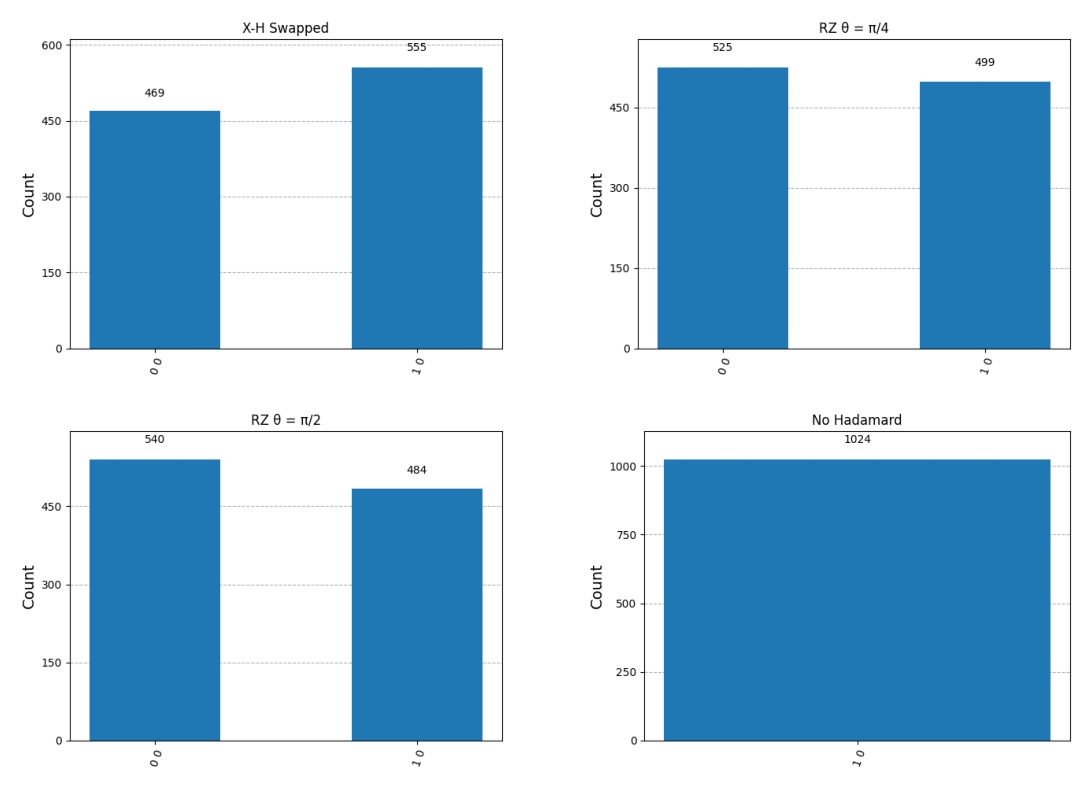

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Helper to plot in a specific axis
def plot_in_axis(counts, ax, title):
    hist = plot_histogram(counts, title=title)
    hist.savefig("temp.png")   # Save to temporary file
    img = plt.imread("temp.png")
    ax.imshow(img)
    ax.axis('off')

plot_in_axis(counts_swap, axs[0,0], "X-H Swapped")
plot_in_axis(counts_angles[pi/4], axs[0,1], "RZ θ = π/4")
plot_in_axis(counts_angles[pi/2], axs[1,0], "RZ θ = π/2")
plot_in_axis(counts_no_h_angle[pi/4], axs[1,1], "No Hadamard")

plt.tight_layout()
plt.show()